# CC cross section + DUNE CC event efficiency from Fig. A2 of https://arxiv.org/pdf/1808.08232.pdf


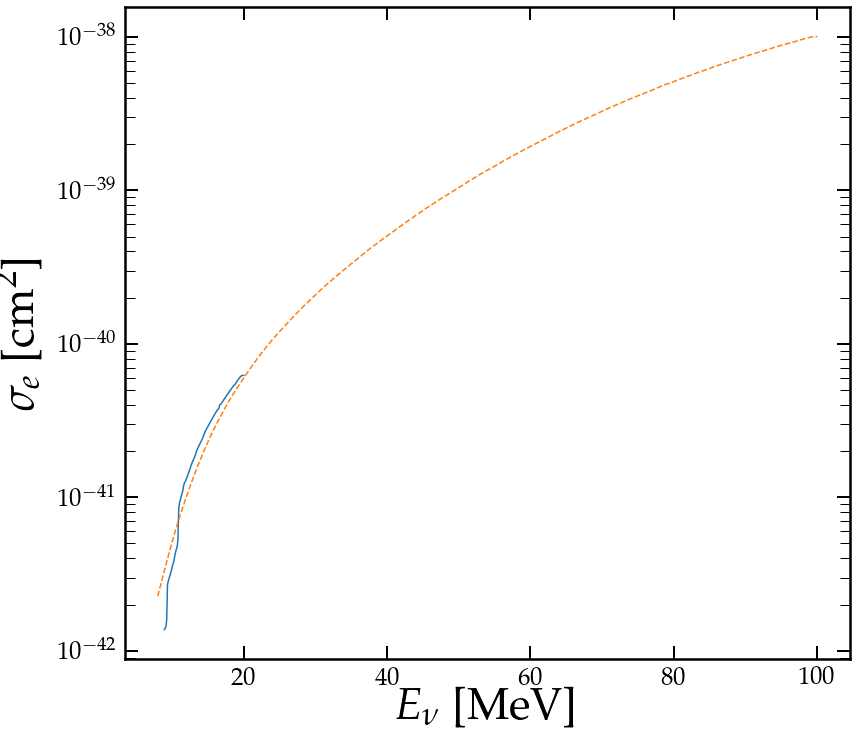

In [53]:
import sys
sys.path.append('../src')
from numpy import *
from numpy import random
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,mark_inset)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from Params import *
from NeutrinoFuncs import *
from WIMPFuncs import *
from PlotFuncs import *
from LabFuncs import *
import cmocean

fig,ax = MySquarePlot(r'$E_\nu$ [MeV]',r'$\sigma_e$ [cm$^{2}$]')

dat = loadtxt(nufile_dir+'nu_e_CC_xsection_DUNE.txt',delimiter=',')
n = 100
E_nu1 = linspace(dat[0,0],20.0,n)
sigCC1 = interp(E_nu1,dat[:,0],dat[:,1]*1e-42)
plt.semilogy(E_nu1,sigCC1)


dat = loadtxt(nufile_dir+'nu_e_CC_xsection2.txt',delimiter=',')
n = 100
E_nu = linspace(5.0,100.0,n)
sigCC = interp(E_nu2,dat[:,0],dat[:,1])
plt.semilogy(E_nu2,sigCC2,'--')


plt.show()

hep N =  10088.069811951082
8B N =  1524777.9686151766
DSNB N =  146.7184610963846
Atm N =  330.8784758081433


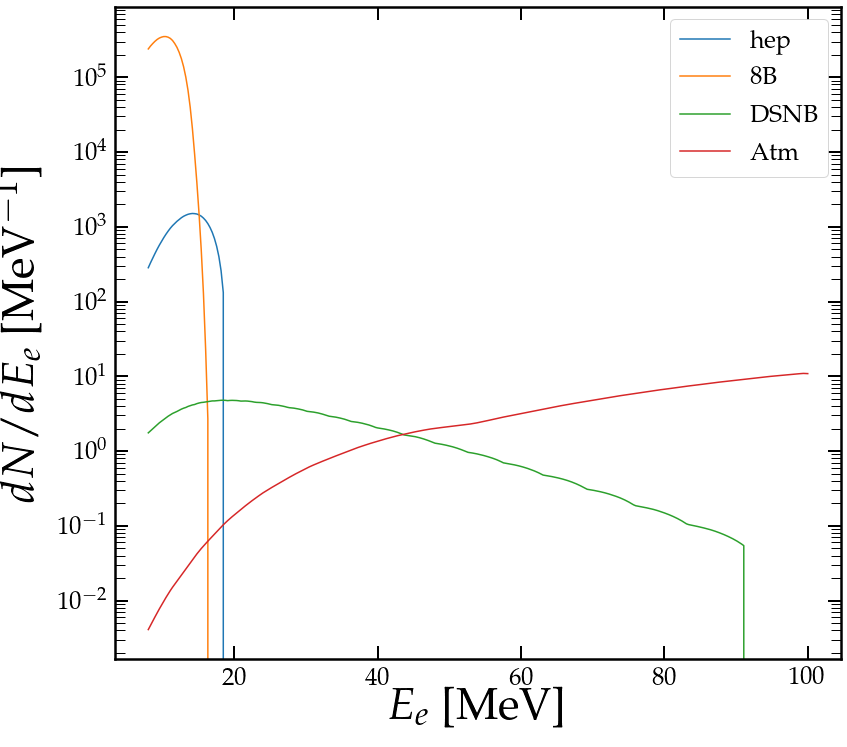

In [76]:
# Load cross section
dat = loadtxt(nufile_dir+'nu_e_CC_xsection2.txt',delimiter=',')
n = 300
E_nu = linspace(8.0,100.0,n)
sigCC = interp(E_nu,dat[:,0],dat[:,1])


fig,ax = MySquarePlot(r'$E_e$ [MeV]',r'$dN/dE_e$ [MeV$^{-1}$]')

Names,Solar,E_nu_all,Flux_all,Flux_norm,Flux_err = GetNuFluxes(3.0,Nuc=Xe131)
n_nu = size(Flux_norm)

AtmNu_e = loadtxt(nufile_dir+'atmospheric/FLUKA/AtmNu_e.txt',delimiter=',')
Flux_all[-1,:] = interp(E_nu_all[-1,:],AtmNu_e[:,0],AtmNu_e[:,1])
Flux_all[-1,E_nu_all[-1,:]>AtmNu_e[:,0]] = 0.0

Nuc = Params.Ar40
N = Nuc.NumberOfNeutrons
Z = Nuc.NumberOfProtons
N = 1.0/((N+Z)*m_p_kg)

dR = zeros(shape=(n_nu,n))
for s in range(0,4):
    Flux_c = interp(E_nu,E_nu_all[s,:],Flux_all[s,:])
    Flux_c[E_nu>E_nu_all[s,-1]] = 0.0
    dR[s,:] = (N*sigCC*Flux_c)*1000*seconds2year*(350e3)
    plt.semilogy(E_nu,dR[s,:],'-',label=Names[s])
    print(Names[s],'N = ',trapz(dR[s,:],E_nu))
plt.legend()
plt.show()

In [73]:
AtmNu_e = loadtxt(nufile_dir+'atmospheric/FLUKA/AtmNu_e.txt',delimiter=',')
Flux_all[-1,:]

array([0.010582  , 0.01062151, 0.01066127, 0.01070131, 0.01074161,
       0.01078218, 0.01082302, 0.01086413, 0.01090551, 0.01094717,
       0.01098911, 0.01103095, 0.01107223, 0.01111379, 0.01115563,
       0.01119775, 0.01124014, 0.01128282, 0.01132579, 0.01136904,
       0.01141257, 0.01145356, 0.01148898, 0.01152463, 0.01156052,
       0.01159664, 0.01163301, 0.01166962, 0.01170648, 0.01174358,
       0.01178092, 0.01181998, 0.01185935, 0.01189897, 0.01193886,
       0.01197902, 0.01201944, 0.01206014, 0.0121011 , 0.01214643,
       0.01221474, 0.01228351, 0.01235274, 0.01242244, 0.01249259,
       0.01256321, 0.01263431, 0.01270587, 0.01277662, 0.01284757,
       0.012919  , 0.0129909 , 0.01306328, 0.01313615, 0.0132095 ,
       0.01328333, 0.01333094, 0.01337706, 0.0134235 , 0.01347024,
       0.01351729, 0.01356465, 0.01361233, 0.0136597 , 0.01370659,
       0.0137538 , 0.01380131, 0.01384915, 0.0138973 , 0.01394578,
       0.01399639, 0.01405162, 0.01410722, 0.01416318, 0.01421

In [74]:
AtmNu_e[:,0]

array([ 13.183,  14.152,  15.122,  16.091,  17.061,  18.03 ,  19.   ,
        19.969,  20.939,  21.908,  22.878,  23.847,  24.817,  25.787,
        26.756,  27.726,  28.695,  29.665,  30.634,  31.604,  32.573,
        33.543,  34.512,  35.482,  36.451,  37.421,  38.39 ,  39.36 ,
        40.33 ,  41.299,  42.269,  43.238,  44.208,  45.177,  46.147,
        47.116,  48.086,  49.055,  50.025,  50.994,  51.964,  52.933,
        53.903,  54.873,  55.842,  56.812,  57.781,  58.751,  59.72 ,
        60.69 ,  61.659,  62.629,  63.598,  64.568,  65.537,  66.507,
        67.477,  68.446,  69.416,  70.385,  71.355,  72.324,  73.294,
        74.263,  75.233,  76.202,  77.172,  78.141,  79.111,  80.08 ,
        81.05 ,  82.02 ,  82.989,  83.959,  84.928,  85.898,  86.867,
        87.837,  88.806,  89.776,  90.745,  91.715,  92.684,  93.654,
        94.623,  95.593,  96.563,  97.532,  98.502,  99.471, 100.44 ,
       101.41 , 102.38 , 103.35 , 104.32 , 105.29 , 106.26 , 107.23 ,
       108.2  , 109.